<a href="https://colab.research.google.com/github/alvaromunaylla/Bioinfo_2025/blob/main/Clase_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧬 Notebook: Bases de datos transcriptómicas y proteómicas

En esta práctica trabajaremos con datos públicos de transcriptómica (GEO) y proteómica (PRIDE). Aprenderemos a acceder, explorar y visualizar estos datos usando Python y herramientas bioinformáticas.

## 🟦 1. Acceso a datos de GEO


### 🔍 Acceso a datos de GEO

Usaremos la librería `GEOparse` para descargar y explorar un conjunto de datos transcriptómicos. GEO contiene datos de microarreglos y RNA-seq de miles de estudios.

📦 Primero, instalamos la librería:


In [ ]:
!pip install GEOparse

In [ ]:
import GEOparse

# Descargamos un dataset de ejemplo (puedes cambiar el ID por otro)
gse = GEOparse.get_GEO(geo="GSE124646", destdir="./")

# Mostramos información general
print(gse.metadata)


27-Sep-2025 00:29:06 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
27-Sep-2025 00:29:06 INFO GEOparse - File already exist: using local version.
INFO:GEOparse:File already exist: using local version.
27-Sep-2025 00:29:06 INFO GEOparse - Parsing ./GSE124646_family.soft.gz: 
INFO:GEOparse:Parsing ./GSE124646_family.soft.gz: 
27-Sep-2025 00:29:06 DEBUG GEOparse - DATABASE: GeoMiame
DEBUG:GEOparse:DATABASE: GeoMiame
27-Sep-2025 00:29:06 DEBUG GEOparse - SERIES: GSE124646
DEBUG:GEOparse:SERIES: GSE124646
27-Sep-2025 00:29:06 DEBUG GEOparse - PLATFORM: GPL96
DEBUG:GEOparse:PLATFORM: GPL96
27-Sep-2025 00:29:07 DEBUG GEOparse - SAMPLE: GSM3538397
DEBUG:GEOparse:SAMPLE: GSM3538397
27-Sep-2025 00:29:07 DEBUG GEOparse - SAMPLE: GSM3538398
DEBUG:GEOparse:SAMPLE: GSM3538398
27-Sep-2025 00:29:07 DEBUG GEOparse - SAMPLE: GSM3538399
DEBUG:GEOparse:SAMPLE: GSM3538399
27-Sep-2025 00:29:07 DEBUG GEOparse - SAMPLE: GSM3538400
DEBUG:GEOparse:SAMP

{'title': ['Breast cancer and normal breast tissue samples to estimate the effect of contamination of breast cancer samples with normal breast tissue'], 'geo_accession': ['GSE124646'], 'status': ['Public on May 30 2019'], 'submission_date': ['Jan 03 2019'], 'last_update_date': ['Jun 29 2019'], 'pubmed_id': ['31231679'], 'summary': ['PURPOSE: To estimate the effect of contamination with normal breast tissue for the development of gene signatures robust to pre-analytical conditions.', 'METHODS: We evaluated the effect of contamination with normal breast tissue on gene signatures by comparing microarray profiles of breast cancer samples contaminated with increasing amounts of normal breast tissue.'], 'overall_design': ['A set of 10 breast cancer samples were mixed with increasing amounts of 10 individual normal breast tissue samples. Samples were contaminated with 0, 10, 25, 50, 75, 80, 85, 90, 95 and 100 % of normal breast tissue, respectively.'], 'type': ['Expression profiling by array'

## 🟦 3. Visualización de expresión génica


### 📊 Visualización de expresión génica

Vamos a explorar la expresión de un gen específico en diferentes muestras.


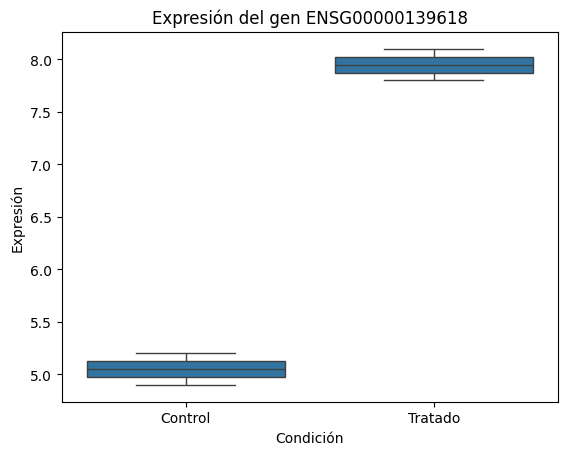

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extraemos la tabla de expresión
expression_data = gse.gsms

# Seleccionamos un gen de ejemplo (ajustar según el dataset)
gene_id = "ENSG00000139618"  # BRCA2 como ejemplo

# Simulamos una tabla de expresión para ilustrar.
data = pd.DataFrame({
    "Muestra": ["A", "B", "C", "D"],
    "Condición": ["Control", "Tratado", "Control", "Tratado"],
    "Expresión": [5.2, 8.1, 4.9, 7.8]

})

sns.boxplot(x="Condición", y="Expresión", data=data)
plt.title(f"Expresión del gen {gene_id}")
plt.show()


## 🟦 4. Exploración de datos proteómicos desde PRIDE


### 🧪 Datos proteómicos desde PRIDE

PRIDE es una base de datos de espectrometría de masas. Vamos a simular la carga de una tabla de abundancia proteica.


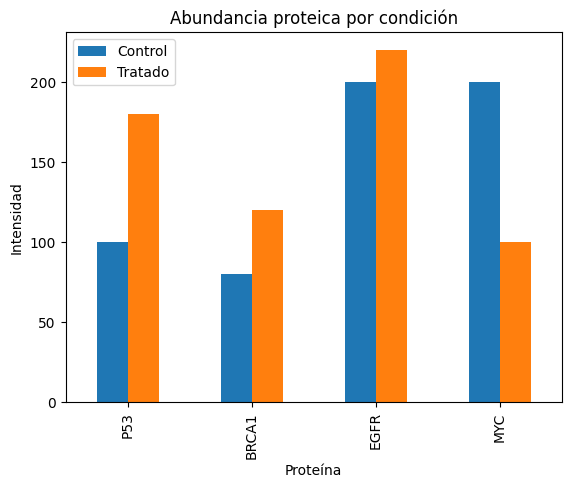

In [ ]:
# Simulamos una tabla de abundancia proteica
proteomics_data = pd.DataFrame({
    "Proteína": ["P53", "BRCA1", "EGFR", "MYC"],
    "Control": [100, 80, 200, 200],
    "Tratado": [180, 120, 220, 100]
})

proteomics_data.set_index("Proteína").plot(kind="bar")
plt.title("Abundancia proteica por condición")
plt.ylabel("Intensidad")
plt.show()


## 🟦 5. Análisis comparativo entre condiciones

Vamos a calcular la diferencia de expresión entre condiciones para cada proteína.


In [ ]:

proteomics_data["Diferencia"] = proteomics_data["Tratado"] - proteomics_data["Control"]
print(proteomics_data[["Proteína", "Diferencia"]])


  Proteína  Diferencia
0      P53          80
1    BRCA1          40
2     EGFR          20
3      MYC        -100


📈 6. Preguntas de análisis comparativo

- ¿Qué significa una diferencia positiva o negativa en la expresión entre condiciones?
La diferencia positiva indica que el nivel de expresión de ese gen ha aumentado luego del tratamiento, mientras que la diferencia negativa indica que el nivel de expresión ha disminuido.

- ¿Cómo podrías determinar si esa diferencia es estadísticamente significativa?
Mediante una prueba estadística, identificando el nivel de expresión promedio del gen en un estado basal, y comparándolo con el nivel de expresión promedio de ese gen luego del tratamiento. Además, se puede establecer un umbral a partir del cual ya se puede considerar una expresión diferencial significtiva

- ¿Qué hipótesis podrías plantear a partir de los resultados obtenidos?
  La condición estudiada está asociada a la expresión de genes implicados en la respuesta tumoral.
